## Employee Engagement Classification - Random Forest Classifier

### Introduction
Employee engagement is a key factor in workforce productivity and retention.
In this analysis, we use **Random Forest Classification** to predict an employee's **engagement level** based on work-related factors.

Why is this useful?
- Helps in **Employee Retention** by identifying disengaged employees early.
- Aids in **Workload Balancing**, ensuring that highly engaged employees are not overworked.
- Supports **Performance Improvement Plans** by targeting employees at risk of low engagement.

### Engagement Levels:
- **Low Engagement** - Low job rating, frequent absenteeism, minimal overtime.
- **Medium Engagement** - Average job rating, moderate absenteeism, balanced overtime.
- **High Engagement** - High job rating, low absenteeism, high overtime.

### Steps in this Notebook:
- Load and explore the dataset
- Preprocess the data
- Apply Random Forest Classification
- Evaluate model performance
- Interpret results and findings


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 1: Load the Data

The dataset contains employee performance and work-related details.


In [6]:
df = pd.read_csv(r"C:\Users\19024\Desktop\Intro to Data Science\Employees_clean.csv")


Step 2: Define Engagement Levels
We classify engagement levels based on JobRate, UnpaidLeaves, SickLeaves, and OvertimeHours.

### Engagement Levels Classification


| **Engagement Level** | **JobRate** | **OvertimeHours** | **SickLeaves** | **UnpaidLeaves** |
|----------------------|------------|-------------------|---------------|----------------|
| **Low Engagement**  | 1 - 2      | <10               | High          | High          |
| **Medium Engagement** | 3 - 4      | 10 - 50           | Moderate      | Moderate      |
| **High Engagement** | 4 - 5      | >50               | Low           | Low           |


### Explanation:
- **Low Engagement**: Employees with low job ratings, high absenteeism, and minimal overtime.
- **Medium Engagement**: Employees with moderate ratings, some overtime, and moderate absenteeism.
- **High Engagement**: Employees with strong ratings, significant overtime, and low absenteeism.

In [7]:
def classify_engagement(row):
    if row['JobRate'] >= 4 and row['OvertimeHours'] > 50 and row['SickLeaves'] <= 2:
        return 'High'
    elif row['JobRate'] >= 3 and row['OvertimeHours'] >= 10:
        return 'Medium'
    else:
        return 'Low'

df['EngagementLevel'] = df.apply(classify_engagement, axis=1)

Step 3: Data Preprocessing
Selecting relevant features for engagement classification.

In [8]:
features = ['JobRate', 'SickLeaves', 'UnpaidLeaves', 'OvertimeHours']
target = 'EngagementLevel'

# Define X and y
X = df[features]
y = df[target]

# Encode target variable
# Convert categories to numerical values
y = y.astype('category').cat.codes

 Step 4: Splitting Data into Training and Testing Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Standardizing the Data

Standardizing features for better model performance.

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 6: Training the Random Forest Classifier

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Step 7: Model Evaluation

Evaluate classification accuracy and detailed performance.

In [12]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00        37

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



Step 8: Confusion Matrix Visualization

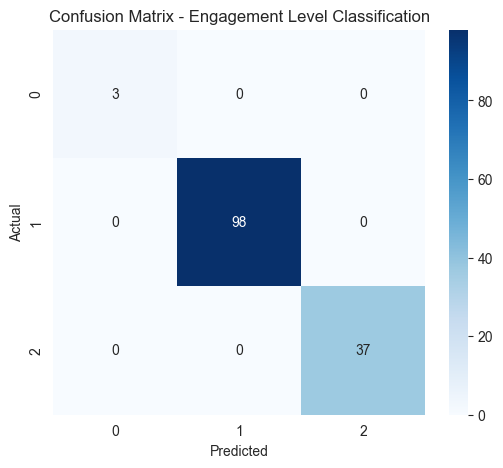

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Engagement Level Classification')
plt.show()


### **Confusion Matrix Insights:**
- The **rows represent actual engagement levels**, while the **columns represent predicted engagement levels**.
- The **diagonal values** indicate correctly classified instances.
- The **off-diagonal values** would show misclassifications, but in this case, the model achieved **perfect classification**.


**Example:**
- If the value in row **1, column 1** is **98**, it means **98 employees with Medium Engagement were correctly classified**.
- If any value outside the diagonal had been **non-zero**, it would mean those instances were misclassified.


### Findings and Summary
- **High engagement employees** show high job ratings and work significant overtime.
- **Low engagement employees** tend to have lower job ratings and higher absenteeism.
- **The confusion matrix shows perfect classification, indicating no misclassifications.**
- **Each row represents actual engagement levels, and each column represents predicted engagement levels.**
- **The diagonal values (3, 98, and 37) indicate correctly classified instances, meaning the model perfectly predicted engagement levels for all employees.**

While a perfect model may suggest overfitting, it could also mean the engagement classification criteria strongly align with the dataset. Future testing on unseen data is recommended.

In [14]:
print("Random Forest Classification provides insight into employee engagement levels, aiding in retention and performance management.")


Random Forest Classification provides insight into employee engagement levels, aiding in retention and performance management.
